In [1]:
tracks={}
for no in ['A','B','C','D']:
    tracks[no] = pd.read_csv("dataset/track_" + no + ".csv", parse_dates=["date"])

In [2]:
equipments={}
for no in ['A','B','C','D']:
    equipments[no] = pd.read_csv("dataset/equipment_" + no + ".csv")

In [3]:
import datetime

In [4]:
from tqdm import tqdm

In [5]:
import pandas_profiling as pdp

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_

In [7]:
import random

In [18]:
import sys

In [42]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [296]:
from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=8, random_state=0)
kmeans = KMeans(n_clusters=5, random_state=0)

In [224]:
def get_day(dates):
    day = [(date - datetime.datetime(2017, 4, 1)).days for date in dates]
    return day

In [761]:
def feature_engineering(df):
    df['day'] = get_day(df['date'])
    df = df.drop('date', axis=1)
    df['diff_moving_mean'] = df['高低左'] - df['高低左'].rolling(window=7, min_periods=4, center=True).median()
    df['moving_variance'] = df['高低左'].rolling(window=7, min_periods=4, center=True).kurt()
    df['accumulation_diff_moving_mean'] = np.cumsum(abs(df['高低左'] -
                                                        df['高低左'].rolling(window=15, min_periods=1, center=False).median()))
    return df

In [770]:
def standard_scaling(df):
    df['day'] = ss.fit_transform(df['day'].values.reshape(len(df), 1))/3
    df['高低左'] = ss.fit_transform(df['高低左'].values.reshape(len(df), 1))
    df['diff_moving_mean'] = ss.fit_transform(df['diff_moving_mean'].values.reshape(len(df), 1))/5
    df['moving_variance'] = ss.fit_transform(df['moving_variance'].values.reshape(len(df), 1))/10
    df['accumulation_diff_moving_mean'] = ss.fit_transform(df['accumulation_diff_moving_mean'].values.reshape(len(df), 1))/5
    return df

In [267]:
def kmeans_outliers(df):
    df = feature_engineering(df)
    df = standard_scaling(df)
    kmeans.fit(df)
    df['label'] = kmeans.labels_
    return df

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


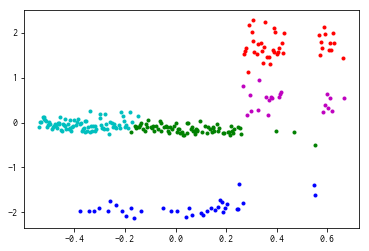

In [771]:
data = track.loc[track['キロ程'] == 10002, ['date', '高低左']]
data = data.dropna(subset=['高低左'])
data = kmeans_outliers(data)
plt.plot(data.loc[data['label'] == 0, 'day'], data.loc[data['label'] == 0, '高低左'], marker='.', linewidth=0, c='b')
plt.plot(data.loc[data['label'] == 1, 'day'], data.loc[data['label'] == 1, '高低左'], marker='.', linewidth=0, c='g')
plt.plot(data.loc[data['label'] == 2, 'day'], data.loc[data['label'] == 2, '高低左'], marker='.', linewidth=0, c='r')
plt.plot(data.loc[data['label'] == 3, 'day'], data.loc[data['label'] == 3, '高低左'], marker='.', linewidth=0, c='c')
plt.plot(data.loc[data['label'] == 4, 'day'], data.loc[data['label'] == 4, '高低左'], marker='.', linewidth=0, c='m')

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


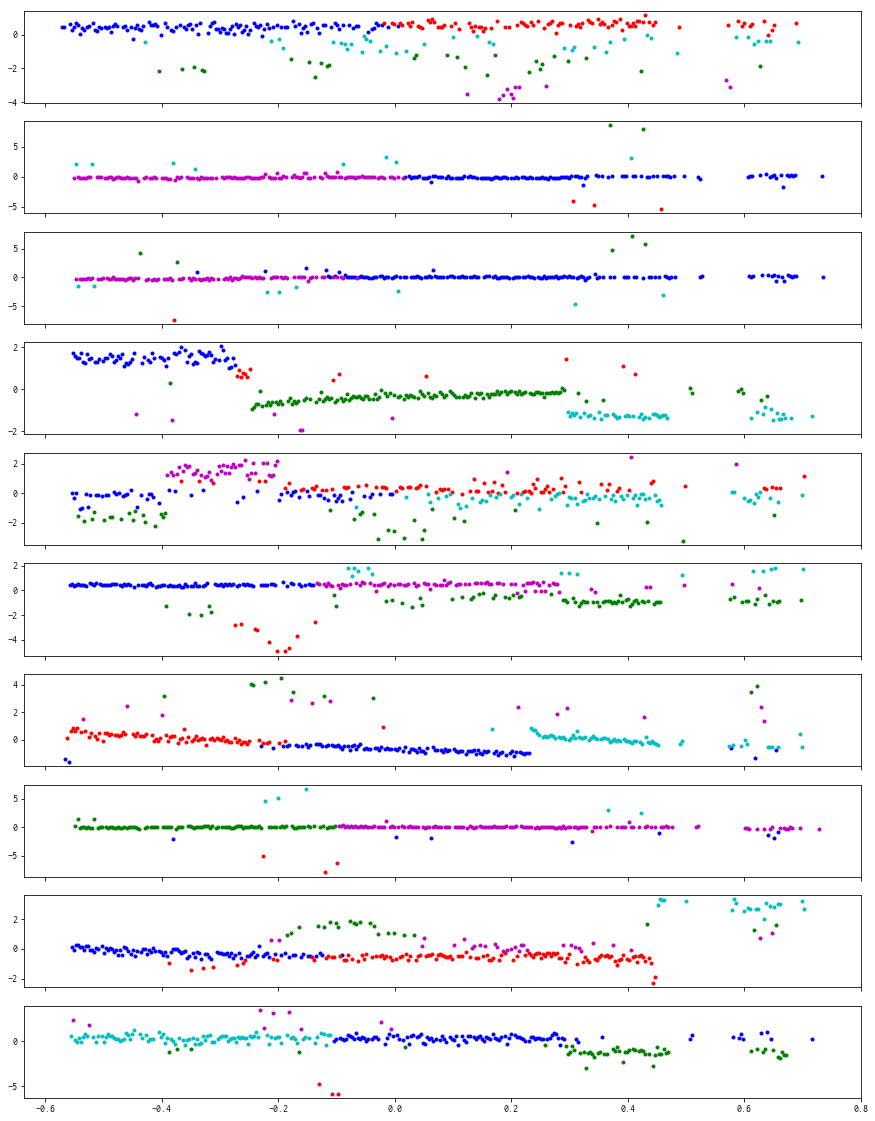

In [772]:
fig, axes = plt.subplots(10, 1, figsize=(15, 20), sharex=True)
random.seed(110)
track = tracks['A']
kilos = track['キロ程'].unique()

for i, kilo in enumerate(random.sample(list(kilos), 10)):
    data = track.loc[track['キロ程'] == kilo, ['date', '高低左']]
    data = data.dropna(subset=['高低左'])
#    if len(data) < 4:
    if len(data) < 8:
        print(i)
        continue
    data = kmeans_outliers(data)
#    axes[i].plot(data['day'], data['diff_moving_mean'], c='k', alpha=0.5)
    axes[i].plot(data.loc[data['label'] == 0, 'day'], data.loc[data['label'] == 0, '高低左'], marker='.', linewidth=0, c='b')
    axes[i].plot(data.loc[data['label'] == 1, 'day'], data.loc[data['label'] == 1, '高低左'], marker='.', linewidth=0, c='g')
    axes[i].plot(data.loc[data['label'] == 2, 'day'], data.loc[data['label'] == 2, '高低左'], marker='.', linewidth=0, c='r')
    axes[i].plot(data.loc[data['label'] == 3, 'day'], data.loc[data['label'] == 3, '高低左'], marker='.', linewidth=0, c='c')
    axes[i].plot(data.loc[data['label'] == 4, 'day'], data.loc[data['label'] == 4, '高低左'], marker='.', linewidth=0, c='m')
#    axes[i].plot(data.loc[data['label'] == 5, 'day'], data.loc[data['label'] == 5, '高低左'], marker='.', linewidth=0, c='y')
#    axes[i].plot(data.loc[data['label'] == 6, 'day'], data.loc[data['label'] == 6, '高低左'], marker='.', linewidth=0, c='k')
#    axes[i].plot(data.loc[data['label'] == 7, 'day'], data.loc[data['label'] == 7, '高低左'], marker='.', linewidth=0, c='#ffff33')
#    axes[i].plot(data.loc[data['label'] == 7, 'day'], data.loc[data['label'] == 7, '高低左'], marker='.', linewidth=0, c='#f781bf')

In [377]:
from sklearn.svm import OneClassSVM
svm = OneClassSVM(nu=0.2, kernel='rbf', gamma=0.01)

In [366]:
def feature_engineering(df):
    df['day'] = get_day(df['date'])
    df = df.drop('date', axis=1)
    df['diff_moving_mean'] = df['高低左'] - df['高低左'].rolling(window=7, min_periods=4, center=True).median()
    df['moving_variance'] = df['高低左'].rolling(window=7, min_periods=4, center=True).kurt()
#    df['diff_moving_mean'] = df['高低左'] - df['高低左'].rolling(window=7, min_periods=4).median()
#    df['moving_variance'] = df['高低左'].rolling(window=7, min_periods=4).kurt()
#    df = df.dropna(subset=['diff_moving_mean', 'moving_variance'])
    return df

In [370]:
def standard_scaling(df):
    df['day'] = ss.fit_transform(df['day'].values.reshape(len(df), 1))/5
    df['高低左'] = ss.fit_transform(df['高低左'].values.reshape(len(df), 1))
    df['diff_moving_mean'] = ss.fit_transform(df['diff_moving_mean'].values.reshape(len(df), 1))
    df['moving_variance'] = ss.fit_transform(df['moving_variance'].values.reshape(len(df), 1))*0
    return df

In [349]:
def svm_outliers(df):
    df = feature_engineering(df)
    df = standard_scaling(df)
    svm.fit(df)
    df['label'] = svm.predict(df)
    return df

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


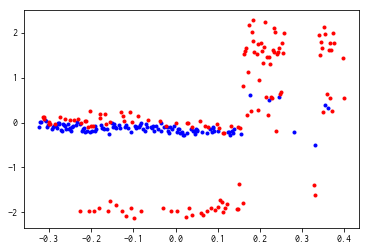

In [371]:
data = track.loc[track['キロ程'] == 10002, ['date', '高低左']]
data = data.dropna(subset=['高低左'])
data = svm_outliers(data)
plt.plot(data.loc[data['label'] == 1, 'day'], data.loc[data['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
plt.plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


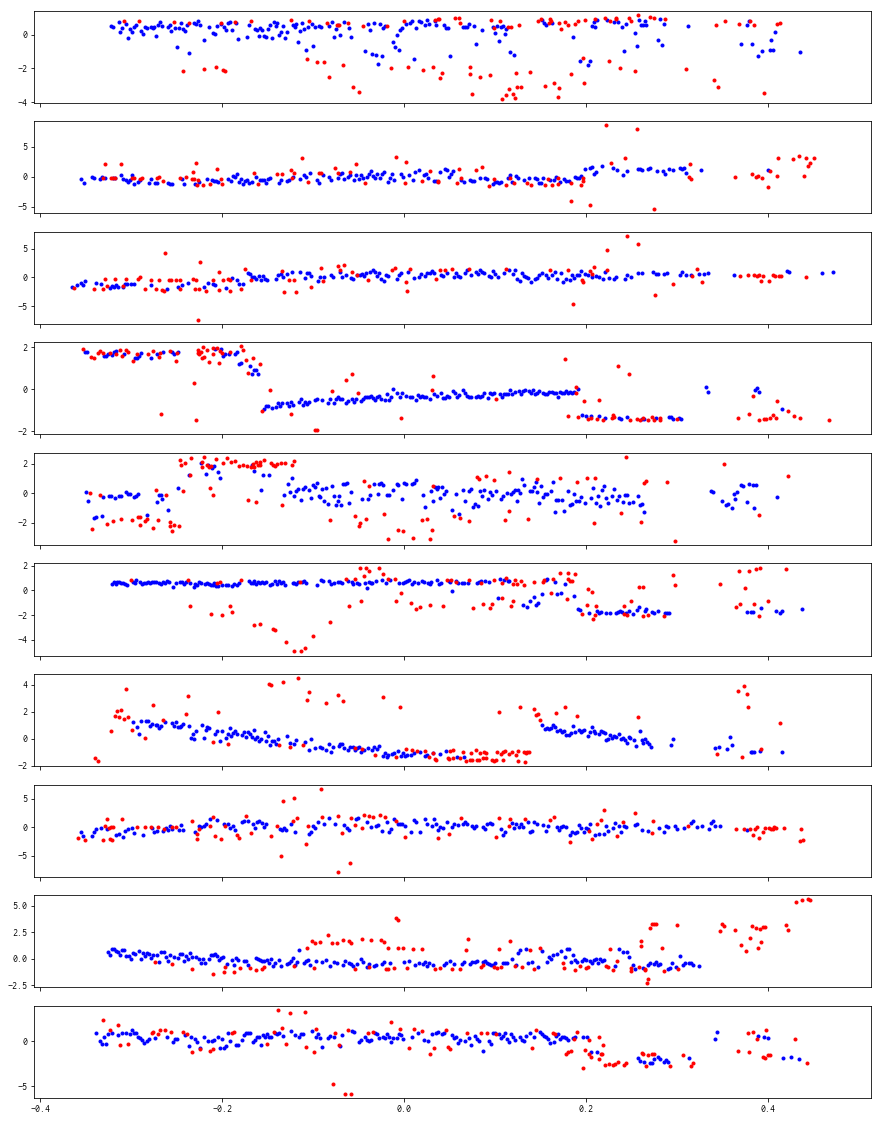

In [378]:
fig, axes = plt.subplots(10, 1, figsize=(15, 20), sharex=True)
random.seed(110)
track = tracks['A']
kilos = track['キロ程'].unique()

for i, kilo in enumerate(random.sample(list(kilos), 10)):
    data = track.loc[track['キロ程'] == kilo, ['date', '高低左']]
    data = data.dropna(subset=['高低左'])
    if len(data) < 2:
        print(i)
        continue

    data = svm_outliers(data)
#    axes[i].plot(data.loc[data['label'] == 1, 'day'], data.loc[data['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
#    axes[i].plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

    data['date'] = track.loc[track['キロ程'] == kilo, 'date']
    data2 = data[data['label'] == 1]
    data2 = svm_outliers(data2)
    axes[i].plot(data2.loc[data2['label'] == 1, 'day'], data2.loc[data2['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
    axes[i].plot(data2.loc[data2['label'] == -1, 'day'], data2.loc[data2['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')
    axes[i].plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

In [380]:
import changefinder
cf = changefinder.ChangeFinder(r=0.01, order=1, smooth=15)

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


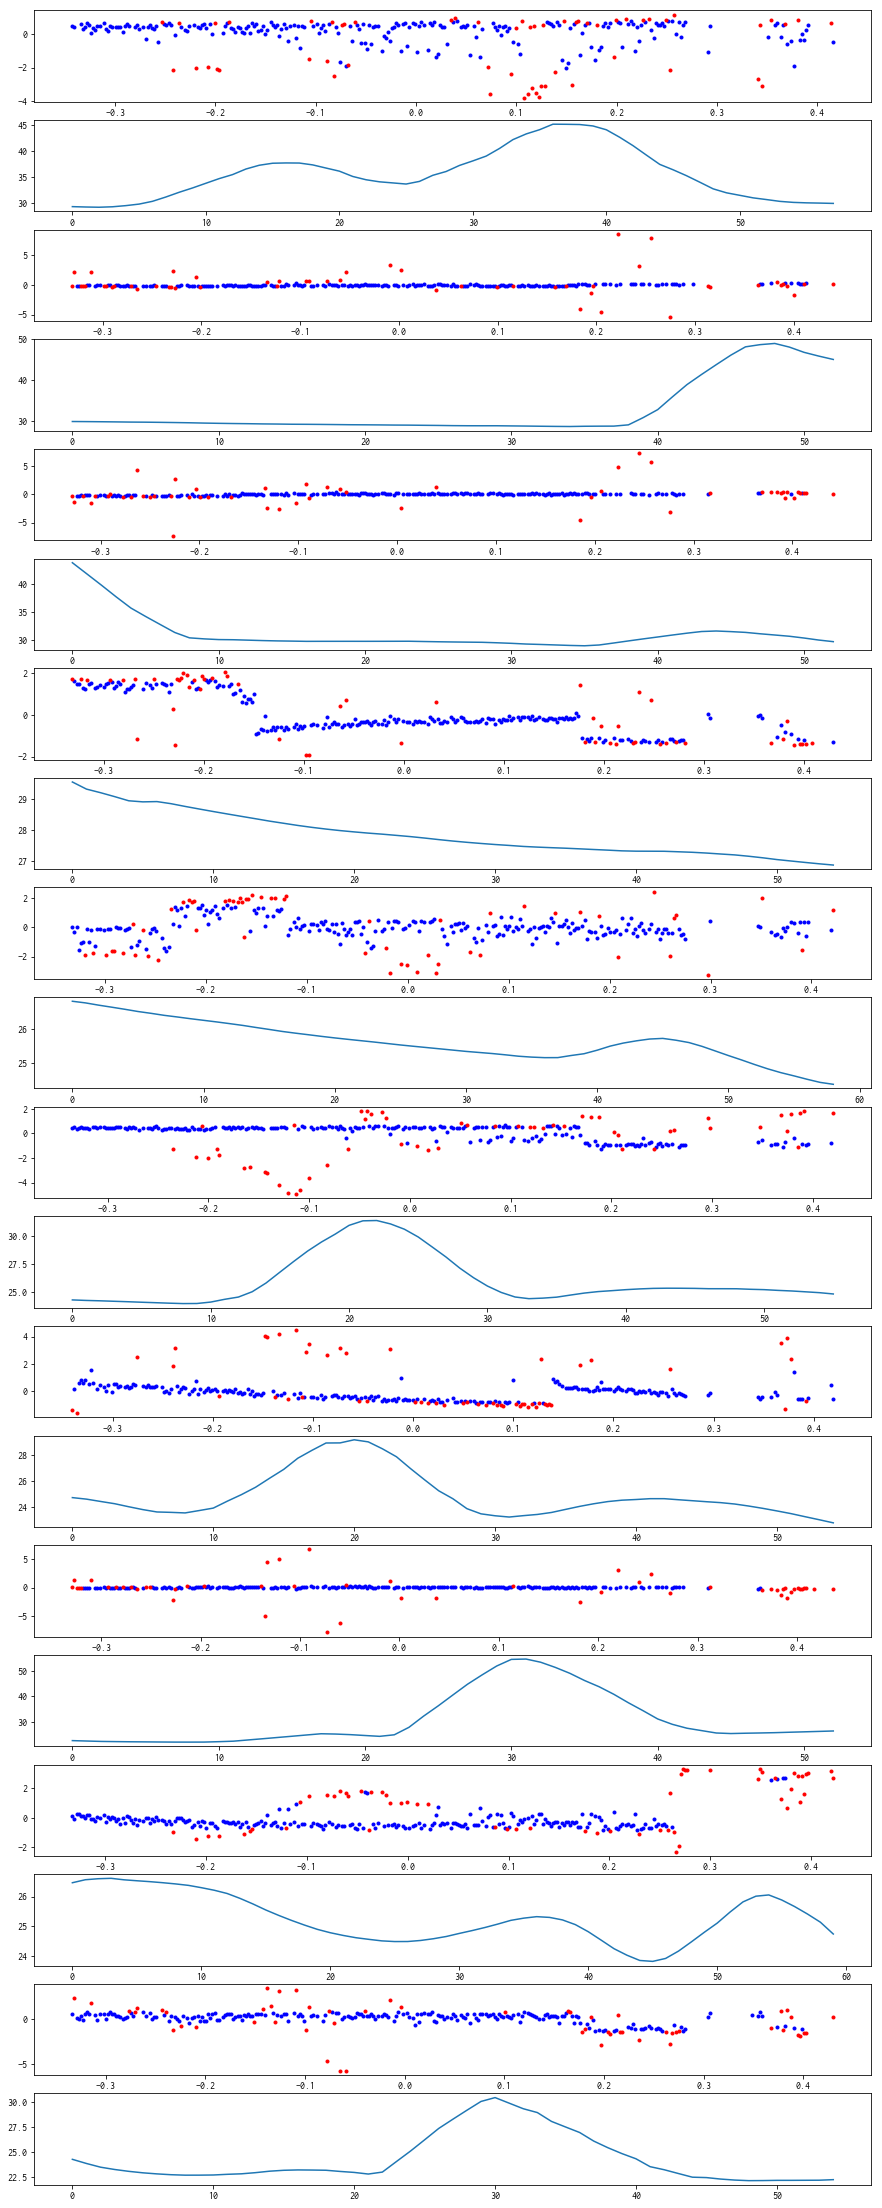

In [390]:
#fig, axes = plt.subplots(20, 1, figsize=(15, 40), sharex=True)
fig, axes = plt.subplots(20, 1, figsize=(15, 40))
random.seed(110)
track = tracks['A']
kilos = track['キロ程'].unique()

for i, kilo in enumerate(random.sample(list(kilos), 10)):
    data = track.loc[track['キロ程'] == kilo, ['date', '高低左']]
    data = data.dropna(subset=['高低左'])
    if len(data) < 2:
        print(i)
        continue

    data = svm_outliers(data)
#    data['day'] = get_day(track.loc[track['キロ程'] == kilo, 'date'].dropna(subset=['高低左']))
    axes[i*2].plot(data.loc[data['label'] == 1, 'day'], data.loc[data['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
    axes[i*2].plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

    data = data[data['label'] == -1]
    ret = []
    for j in data['高低左'].values:
        score = cf.update(j)
        ret.append(score)

    axes[i*2+1].plot(ret)

In [396]:
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=0.5, random_state=0)

In [366]:
def feature_engineering(df):
    df['day'] = get_day(df['date'])
    df = df.drop('date', axis=1)
    df['diff_moving_mean'] = df['高低左'] - df['高低左'].rolling(window=7, min_periods=4, center=True).median()
    df['moving_variance'] = df['高低左'].rolling(window=7, min_periods=4, center=True).kurt()
    return df

In [405]:
def standard_scaling(df):
    df['day'] = ss.fit_transform(df['day'].values.reshape(len(df), 1))/5
    df['高低左'] = ss.fit_transform(df['高低左'].values.reshape(len(df), 1))*10
    df['diff_moving_mean'] = ss.fit_transform(df['diff_moving_mean'].values.reshape(len(df), 1))*10
    df['moving_variance'] = ss.fit_transform(df['moving_variance'].values.reshape(len(df), 1))*0.5
    return df

In [393]:
def ee_outliers(df):
    df = feature_engineering(df)
    df = standard_scaling(df)
    ee.fit(df)
    df['label'] = ee.predict(df)
    return df

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


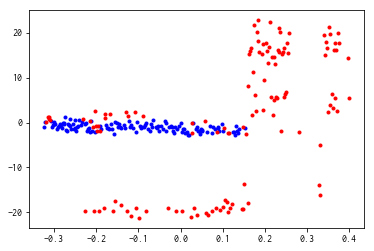

In [406]:
data = track.loc[track['キロ程'] == 10002, ['date', '高低左']]
data = data.dropna(subset=['高低左'])
data = ee_outliers(data)
plt.plot(data.loc[data['label'] == 1, 'day'], data.loc[data['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
plt.plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


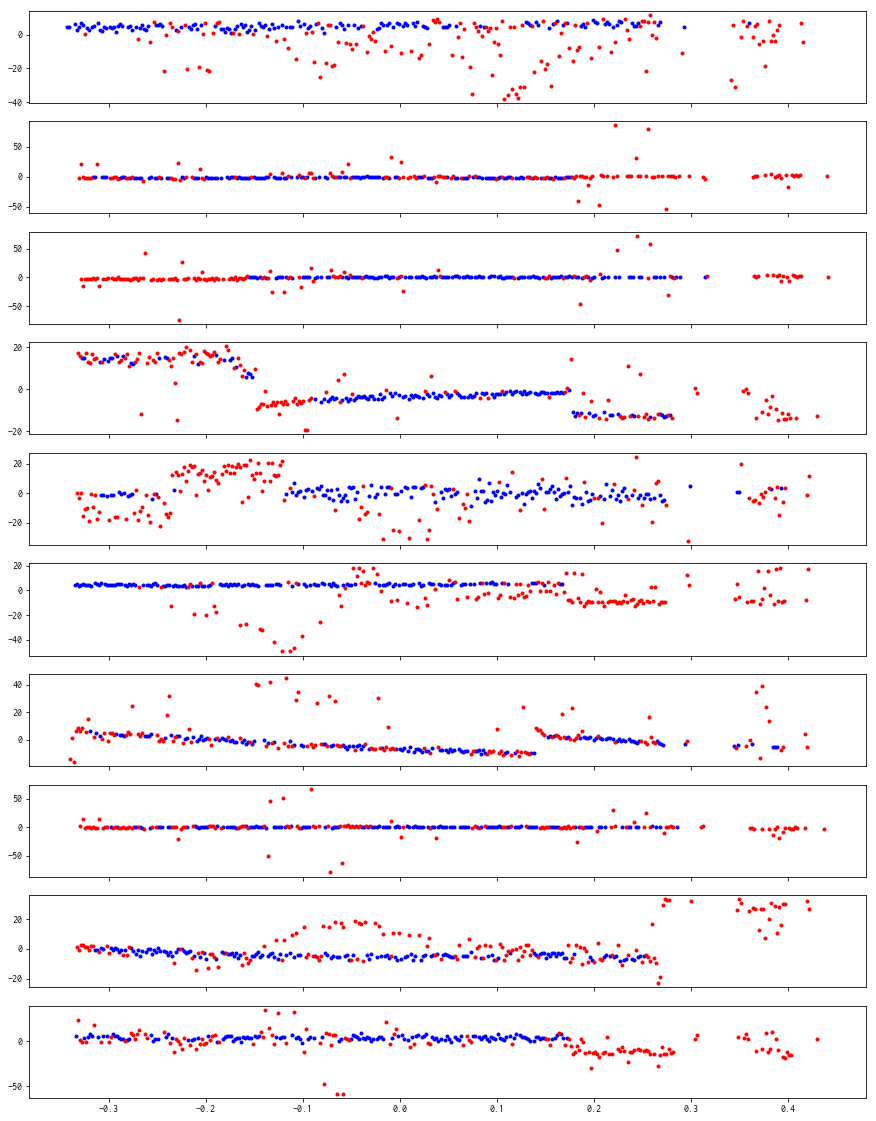

In [407]:
fig, axes = plt.subplots(10, 1, figsize=(15, 20), sharex=True)
random.seed(110)
track = tracks['A']
kilos = track['キロ程'].unique()

for i, kilo in enumerate(random.sample(list(kilos), 10)):
    data = track.loc[track['キロ程'] == kilo, ['date', '高低左']]
    data = data.dropna(subset=['高低左'])
    if len(data) < 2:
        print(i)
        continue

    data = ee_outliers(data)
    axes[i].plot(data.loc[data['label'] == 1, 'day'], data.loc[data['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
    axes[i].plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

#    data['date'] = track.loc[track['キロ程'] == kilo, 'date']
#    data2 = data[data['label'] == 1]
#    data2 = svm_outliers(data2)
#    axes[i].plot(data2.loc[data2['label'] == 1, 'day'], data2.loc[data2['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
#    axes[i].plot(data2.loc[data2['label'] == -1, 'day'], data2.loc[data2['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')
#    axes[i].plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

In [430]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.5,
                       random_state=0,
                       n_estimators=1000)

In [431]:
def feature_engineering(df):
    df['day'] = get_day(df['date'])
    df = df.drop('date', axis=1)
    df['diff_moving_mean'] = df['高低左'] - df['高低左'].rolling(window=7, min_periods=4, center=True).median()
    df['moving_variance'] = df['高低左'].rolling(window=7, min_periods=4, center=True).kurt()
    return df

In [427]:
def standard_scaling(df):
    df['day'] = ss.fit_transform(df['day'].values.reshape(len(df), 1))
    df['高低左'] = ss.fit_transform(df['高低左'].values.reshape(len(df), 1))
    df['diff_moving_mean'] = ss.fit_transform(df['diff_moving_mean'].values.reshape(len(df), 1))
    df['moving_variance'] = ss.fit_transform(df['moving_variance'].values.reshape(len(df), 1))
    return df

In [411]:
def iso_outliers(df):
    df = feature_engineering(df)
    df = standard_scaling(df)
    iso.fit(df)
    df['label'] = iso.predict(df)
    return df

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


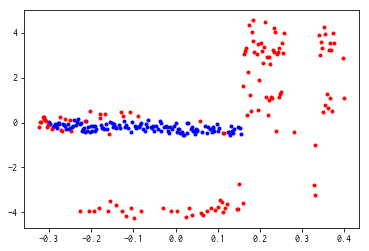

In [432]:
data = track.loc[track['キロ程'] == 10002, ['date', '高低左']]
data = data.dropna(subset=['高低左'])
data = iso_outliers(data)
plt.plot(data.loc[data['label'] == 1, 'day'], data.loc[data['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
plt.plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarnin

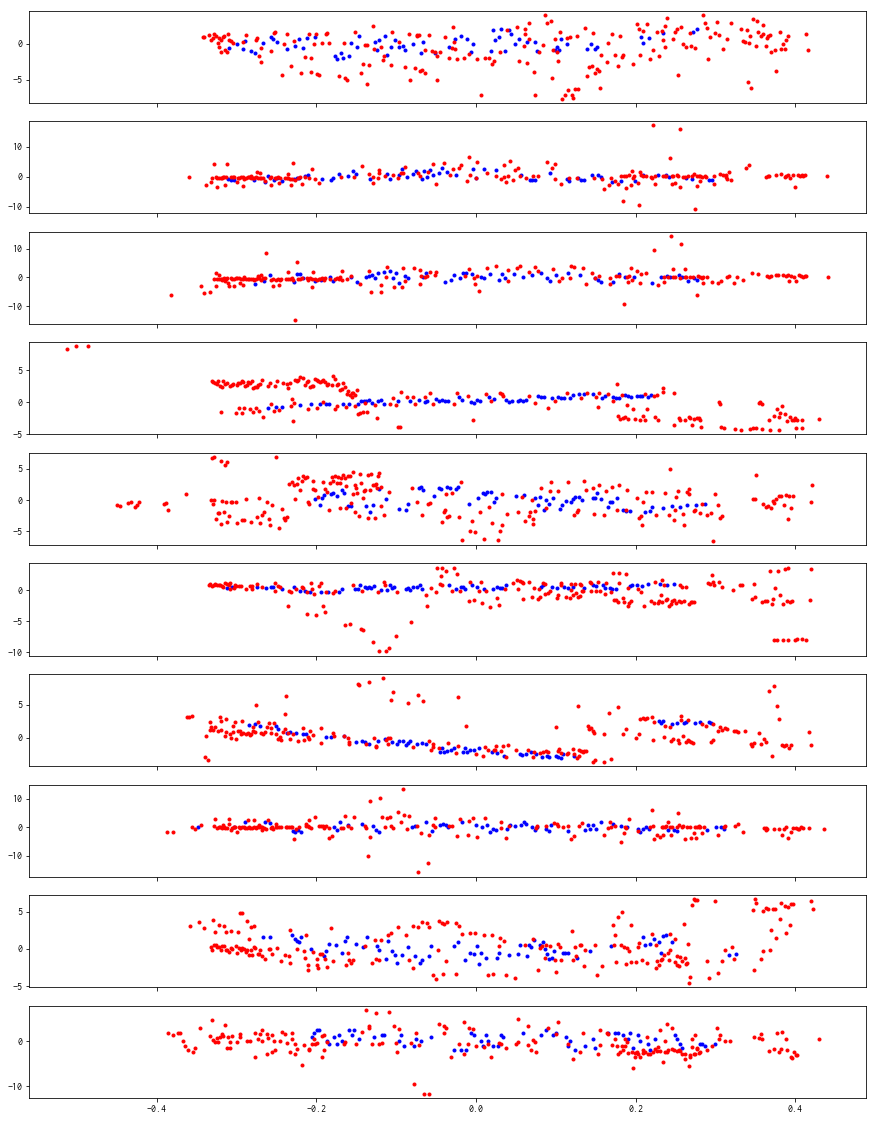

In [433]:
fig, axes = plt.subplots(10, 1, figsize=(15, 20), sharex=True)
random.seed(110)
track = tracks['A']
kilos = track['キロ程'].unique()

for i, kilo in enumerate(random.sample(list(kilos), 10)):
    data = track.loc[track['キロ程'] == kilo, ['date', '高低左']]
    data = data.dropna(subset=['高低左'])
    if len(data) < 2:
        print(i)
        continue

    data = iso_outliers(data)
#    axes[i].plot(data.loc[data['label'] == 1, 'day'], data.loc[data['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
#    axes[i].plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

    data['date'] = track.loc[track['キロ程'] == kilo, 'date']
    data2 = data[data['label'] == 1]
    data2 = iso_outliers(data2)
    axes[i].plot(data2.loc[data2['label'] == 1, 'day'], data2.loc[data2['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
    axes[i].plot(data2.loc[data2['label'] == -1, 'day'], data2.loc[data2['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')
    axes[i].plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

In [456]:
from sklearn.neighbors import LocalOutlierFactor
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
metric = ['minkowsk', 'cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
#lof = LocalOutlierFactor(n_neighbors=20, contamination=0.5, algorithm=algorithm[0], metric=metric[0])
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.5)

In [439]:
def feature_engineering(df):
    df['day'] = get_day(df['date'])
    df = df.drop('date', axis=1)
    df['diff_moving_mean'] = df['高低左'] - df['高低左'].rolling(window=7, min_periods=4, center=True).median()
    df['moving_variance'] = df['高低左'].rolling(window=7, min_periods=4, center=True).kurt()
    return df

In [453]:
def standard_scaling(df):
    df['day'] = ss.fit_transform(df['day'].values.reshape(len(df), 1))*0.1
    df['高低左'] = ss.fit_transform(df['高低左'].values.reshape(len(df), 1))*50
    df['diff_moving_mean'] = ss.fit_transform(df['diff_moving_mean'].values.reshape(len(df), 1))*10
    df['moving_variance'] = ss.fit_transform(df['moving_variance'].values.reshape(len(df), 1))*0.5
    return df

In [443]:
def lof_outliers(df):
    df = feature_engineering(df)
    df = standard_scaling(df)
    df['label'] = lof.fit_predict(df)
    return df

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


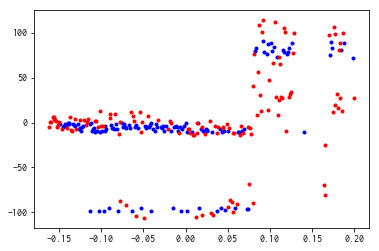

In [454]:
data = track.loc[track['キロ程'] == 10002, ['date', '高低左']]
data = data.dropna(subset=['高低左'])
data = lof_outliers(data)
plt.plot(data.loc[data['label'] == 1, 'day'], data.loc[data['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
plt.plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


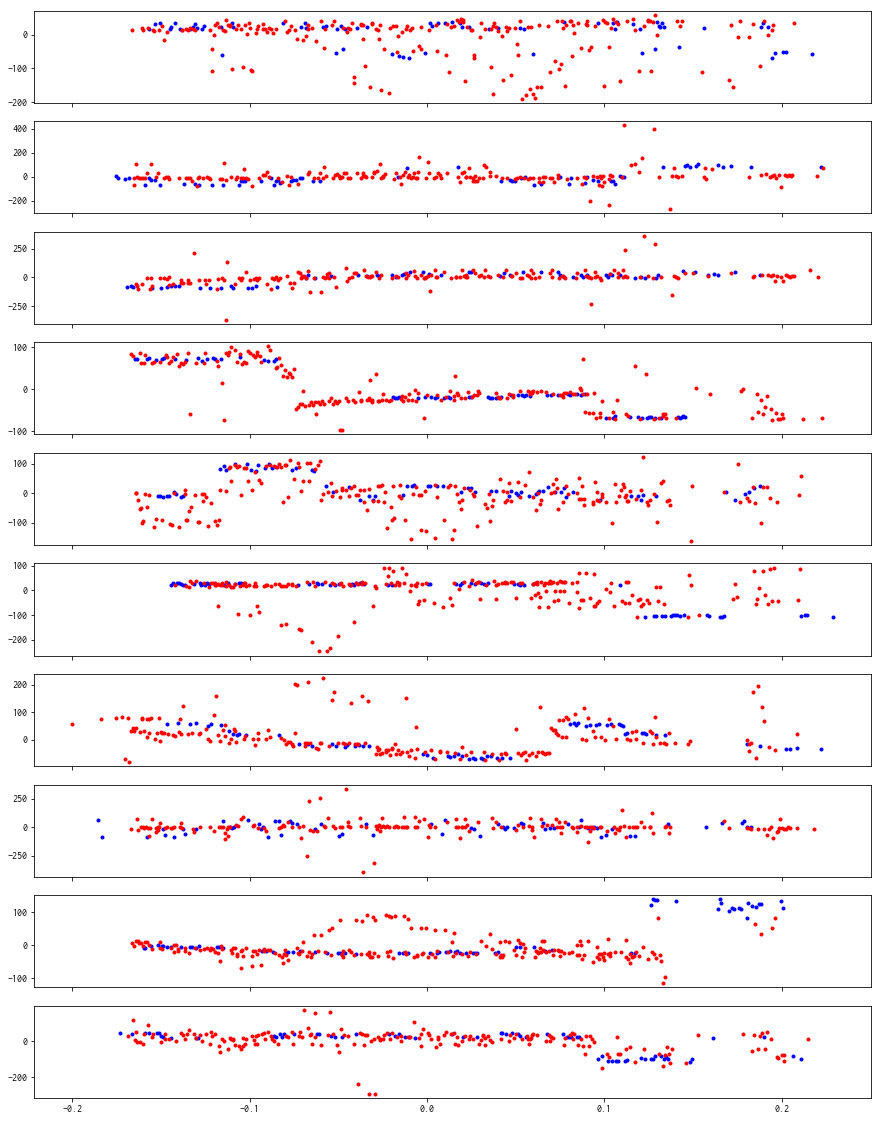

In [457]:
fig, axes = plt.subplots(10, 1, figsize=(15, 20), sharex=True)
random.seed(110)
track = tracks['A']
kilos = track['キロ程'].unique()

for i, kilo in enumerate(random.sample(list(kilos), 10)):
    data = track.loc[track['キロ程'] == kilo, ['date', '高低左']]
    data = data.dropna(subset=['高低左'])
    if len(data) < 2:
        print(i)
        continue

    data = lof_outliers(data)
#    axes[i].plot(data.loc[data['label'] == 1, 'day'], data.loc[data['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
#    axes[i].plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

    data['date'] = track.loc[track['キロ程'] == kilo, 'date']
    data2 = data[data['label'] == 1]
    data2 = lof_outliers(data2)
    axes[i].plot(data2.loc[data2['label'] == 1, 'day'], data2.loc[data2['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
    axes[i].plot(data2.loc[data2['label'] == -1, 'day'], data2.loc[data2['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')
    axes[i].plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

In [460]:
from sklearn.mixture import GaussianMixture
covariance_type = ['full', 'tied', 'diag', 'spherical']
init_params = ['kmeans', 'random']
gm = GaussianMixture(n_components=5, covariance_type="full", random_state=0)

In [461]:
def feature_engineering(df):
    df['day'] = get_day(df['date'])
    df = df.drop('date', axis=1)
    df['diff_moving_mean'] = df['高低左'] - df['高低左'].rolling(window=7, min_periods=4, center=True).median()
    df['moving_variance'] = df['高低左'].rolling(window=7, min_periods=4, center=True).kurt()
    return df

In [462]:
def standard_scaling(df):
    df['day'] = ss.fit_transform(df['day'].values.reshape(len(df), 1))*0.1
    df['高低左'] = ss.fit_transform(df['高低左'].values.reshape(len(df), 1))*50
    df['diff_moving_mean'] = ss.fit_transform(df['diff_moving_mean'].values.reshape(len(df), 1))*10
    df['moving_variance'] = ss.fit_transform(df['moving_variance'].values.reshape(len(df), 1))*0.5
    return df

In [468]:
def gm_outliers(df):
    df = feature_engineering(df)
    df = standard_scaling(df)
    gm.fit(df)
    score_pred = gm.score_samples(df)
    pred = np.where(score_pred <= np.average(score_pred)*0.9, -1, 1)

    df['label'] = pred
    return df

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


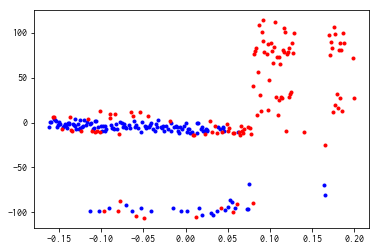

In [469]:
data = track.loc[track['キロ程'] == 10002, ['date', '高低左']]
data = data.dropna(subset=['高低左'])
data = gm_outliers(data)
plt.plot(data.loc[data['label'] == 1, 'day'], data.loc[data['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
plt.plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


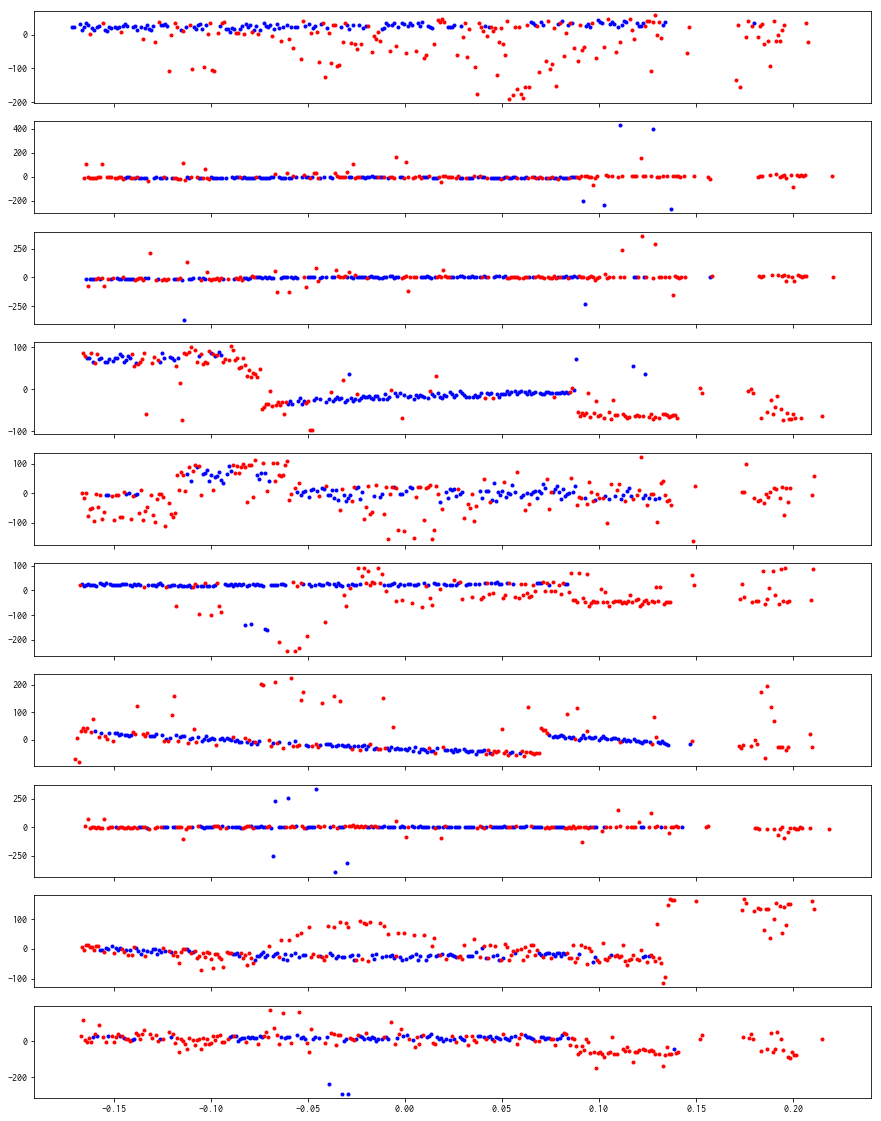

In [471]:
fig, axes = plt.subplots(10, 1, figsize=(15, 20), sharex=True)
random.seed(110)
track = tracks['A']
kilos = track['キロ程'].unique()

for i, kilo in enumerate(random.sample(list(kilos), 10)):
    data = track.loc[track['キロ程'] == kilo, ['date', '高低左']]
    data = data.dropna(subset=['高低左'])
    if len(data) < 2:
        print(i)
        continue

    data = gm_outliers(data)
    axes[i].plot(data.loc[data['label'] == 1, 'day'], data.loc[data['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
    axes[i].plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

#    data['date'] = track.loc[track['キロ程'] == kilo, 'date']
#    data2 = data[data['label'] == 1]
#    data2 = gm_outliers(data2)
#    axes[i].plot(data2.loc[data2['label'] == 1, 'day'], data2.loc[data2['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
#    axes[i].plot(data2.loc[data2['label'] == -1, 'day'], data2.loc[data2['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')
#    axes[i].plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

In [720]:
from sklearn.neighbors import KernelDensity
#bandwidth = [0.5, 1, 2, 4, 8, 16]
bandwidth = [0.1, 1, 10, 50, 100]
kernel = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
metric = ['minkowski', 'cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
leaf_size = [10, 40, 400, 4000]
kd = KernelDensity(bandwidth=bandwidth[3], kernel=kernel[0], metric=metric[0], leaf_size=leaf_size[1])

In [795]:
def feature_engineering(df):
    df['day'] = get_day(df['date'])
    df = df.drop('date', axis=1)
    df['diff_moving_mean'] = df['高低左'] - df['高低左'].rolling(window=7, min_periods=1, center=True).median()
    df['moving_variance'] = df['高低左'].rolling(window=7, min_periods=1, center=True).kurt()
    df['accumulation_diff_moving_mean'] = np.cumsum(abs(df['高低左'] -
                                                        df['高低左'].rolling(window=15, min_periods=1, center=False).median()))
    return df

In [804]:
def feature_engineering3(df):
    df['diff_moving_mean'] = df['高低左'] - df['高低左'].rolling(window=7, min_periods=1, center=True).median()
    return df

In [810]:
def standard_scaling3(df):
#    df['day'] = ss.fit_transform(df['day'].values.reshape(len(df), 1))
    df['高低左'] = ss.fit_transform(df['高低左'].values.reshape(len(df), 1))*50
    return df

In [782]:
def standard_scaling(df):
#    df['day'] = ss.fit_transform(df['day'].values.reshape(len(df), 1))*0.1
    df['高低左'] = ss.fit_transform(df['高低左'].values.reshape(len(df), 1))*50
    df['diff_moving_mean'] = ss.fit_transform(df['diff_moving_mean'].values.reshape(len(df), 1))*50
    df['moving_variance'] = ss.fit_transform(df['moving_variance'].values.reshape(len(df), 1))*0.5
    df['accumulation_diff_moving_mean'] = ss.fit_transform(df['accumulation_diff_moving_mean'].values.reshape(len(df), 1))*50
    return df

In [783]:
def kd_outliers(df):
    df = feature_engineering(df)
    df = standard_scaling(df)
    kd.fit(df)
    score_pred = kd.score_samples(df)
#    pred = np.where(score_pred <= np.average(score_pred)*0.98, -1, 1)
    pred = np.where(score_pred <= np.average(score_pred)*0.999, -1, 1)

    df['label'] = pred
    return df

In [784]:
def kd_outliers2(df):
    df = feature_engineering(df)
    df = standard_scaling2(df)
    kd.fit(df[['高低左', 'accumulation_diff_moving_mean']])
    score_pred = kd.score_samples(df[['高低左', 'accumulation_diff_moving_mean']])
#    kd.fit(df)
#    score_pred = kd.score_samples(df)
    pred = np.where(score_pred <= np.average(score_pred)*0.99998, -1, 1)

    df['label'] = pred
    return df

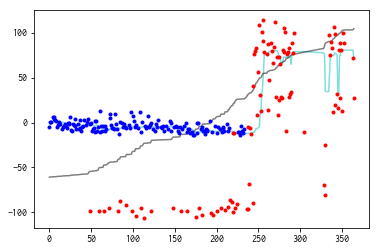

In [756]:
data = track.loc[track['キロ程'] == 10002, ['date', '高低左']]
data = data.dropna(subset=['高低左'])
data = kd_outliers(data)
data['moving_mean'] = data['高低左'].rolling(window=15, min_periods=1, center=False).median()

plt.plot(data['day'], data['moving_mean'], c='c', alpha=0.5)
plt.plot(data['day'], data['accumulation_diff_moving_mean'], c='k', alpha=0.5)
plt.plot(data.loc[data['label'] == 1, 'day'], data.loc[data['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
plt.plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

In [456]:
from sklearn.neighbors import LocalOutlierFactor
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
metric = ['minkowsk', 'cityblock', 'cosine', 'euclidean', 'l1', 'l2', 'manhattan']
#lof = LocalOutlierFactor(n_neighbors=20, contamination=0.5, algorithm=algorithm[0], metric=metric[0])
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.2)

In [806]:
def lof_outliers(df):
    df = feature_engineering3(df)
    df = standard_scaling3(df)
    df['label'] = lof.fit_predict(df)
    return df

NameError: name 'random' is not defined

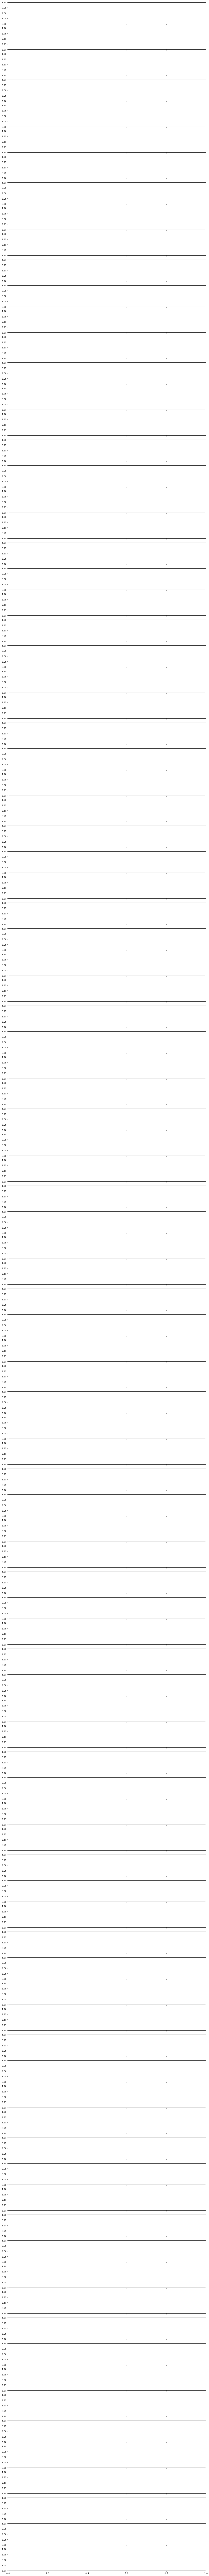

In [1]:
fig, axes = plt.subplots(100, 1, figsize=(15, 200), sharex=True)
random.seed(110)
track = tracks['A']
kilos = track['キロ程'].unique()

for i, kilo in enumerate(random.sample(list(kilos), 100)):
    data = track.loc[track['キロ程'] == kilo, ['date', '高低左']]
    data = data.dropna(subset=['高低左'])
    if len(data) < 8:
        print(i)
        continue

    data = kd_outliers(data)
#    data['moving_mean'] = data['高低左'].rolling(window=15, min_periods=1, center=False).median()

#    axes[i].plot(data['day'], data['moving_mean'], c='c', alpha=0.5)
##    axes[i].plot(data['day'], data['diff_moving_mean'], c='c', alpha=0.5)
#    axes[i].plot(data['day'], data['accumulation_diff_moving_mean'], c='k', alpha=0.5)
#    axes[i].plot(data.loc[data['label'] == 1, 'day'], data.loc[data['label'] == 1, '高低左'], marker='.', linewidth=0, c='b')
#    axes[i].plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左'], marker='.', linewidth=0, c='r')

    data['date'] = track.loc[track['キロ程'] == kilo, 'date']
    data2 = data[data['label'] == 1]
    data2 = kd_outliers2(data2)
    data2['moving_mean'] = data2['高低左'].rolling(window=15, min_periods=1, center=False).median()
    data2['moving_mean'] = ss.fit_transform(data2['moving_mean'].values.reshape(len(data2), 1))

    data['date'] = track.loc[track['キロ程'] == kilo, 'date']
    data3 = data[data['label'] == 1]
    data3 = data2[data2['label'] == 1]
    data3 = lof_outliers(data3)

    axes[i].plot(data3.loc[data3['label'] == 1, 'day'], data3.loc[data3['label'] == 1, '高低左']/50, marker='.', linewidth=0, c='b')
    axes[i].plot(data3.loc[data3['label'] == -1, 'day'], data3.loc[data3['label'] == -1, '高低左']/50, marker='.', linewidth=0, c='r')
    axes[i].plot(data2.loc[data2['label'] == -1, 'day'], data2.loc[data2['label'] == -1, '高低左'], marker='.', linewidth=0, c='g')
    axes[i].plot(data.loc[data['label'] == -1, 'day'], data.loc[data['label'] == -1, '高低左']/50, marker='.', linewidth=0, c='c')